In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### EDA

In [10]:
df.duplicated().any()

False

In [11]:
test.duplicated().any()

False

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isna().sum()).reset_index()
    miss1.columns = ['columns', 'Total']
    miss2 = pd.DataFrame(df.isna().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', '%']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Total']!=0]
missing_data(df)

,columns,Total,%
5,Age,177,19.865320
10,Cabin,687,77.104377
11,Embarked,2,0.224467


In [15]:
def missing_data(test):
    miss1 = pd.DataFrame(test.isna().sum()).reset_index()
    miss1.columns = ['columns', 'Total']
    miss2 = pd.DataFrame(test.isna().sum()/test.shape[0]*100).reset_index()
    miss2.columns = ['columns', '%']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Total']!=0]
missing_data(test)

,columns,Total,%
4,Age,86,20.574163
8,Fare,1,0.239234
9,Cabin,327,78.229665


Cleaning

In [16]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
mean_age = round(df['Age'].mean())
df['Age'] = df['Age'].fillna(mean_age)

In [18]:
df.drop('Cabin', axis=1, inplace=True)

In [19]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


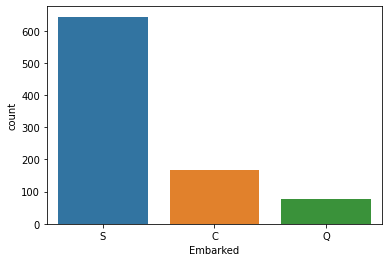

In [20]:
sns.countplot(df['Embarked'])

In [21]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [22]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [24]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [25]:
mean_age1 = round(test['Age'].mean())
test['Age'] = test['Age'].fillna(mean_age1)

In [26]:
test['Age'] = round(test['Age'])

In [27]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [28]:
mean_fare = round(test['Fare'].mean())
test['Fare'] = test['Fare'].fillna(mean_fare)

In [29]:
test.drop('Cabin', axis=1, inplace=True)

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


Converting

In [31]:
#FARE
data = [df,test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [32]:
#NAME
df.drop(['Name'], axis=1, inplace=True)

In [33]:
test.drop(['Name'], axis=1, inplace=True)

In [34]:
#SEX
genders = {"male": 1, "female": 0}
data = [df,test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [35]:
#TICKET
df.drop(['Ticket'], axis=1, inplace=True)

In [36]:
test.drop(['Ticket'], axis=1, inplace=True)

In [38]:
#PASSENGER ID
df.drop(['PassengerId'], axis=1, inplace=True)

In [39]:
test.drop(['PassengerId'], axis=1, inplace=True)

In [40]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7,S
1,1,1,0,38.0,1,0,71,C
2,1,3,0,26.0,0,0,7,S


In [41]:
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.0,0,0,7,Q
1,3,0,47.0,1,0,7,S
2,2,1,62.0,0,0,9,Q


Visualisasi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


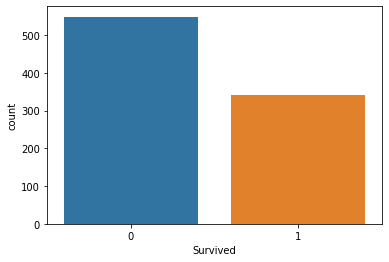

In [42]:
sns.countplot(df['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


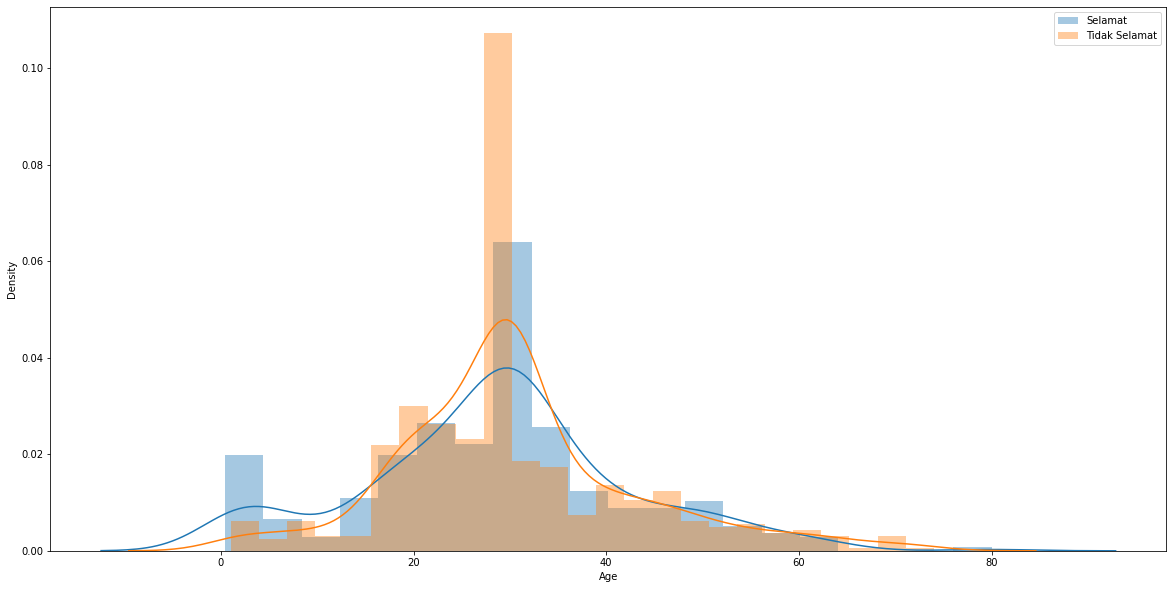

In [43]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Survived']==1]['Age'], label='Selamat')
sns.distplot(df[df['Survived']==0]['Age'], label='Tidak Selamat')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


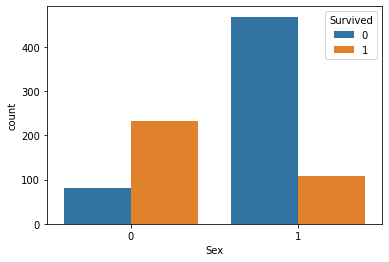

In [44]:
sns.countplot(df['Sex'], hue=df['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


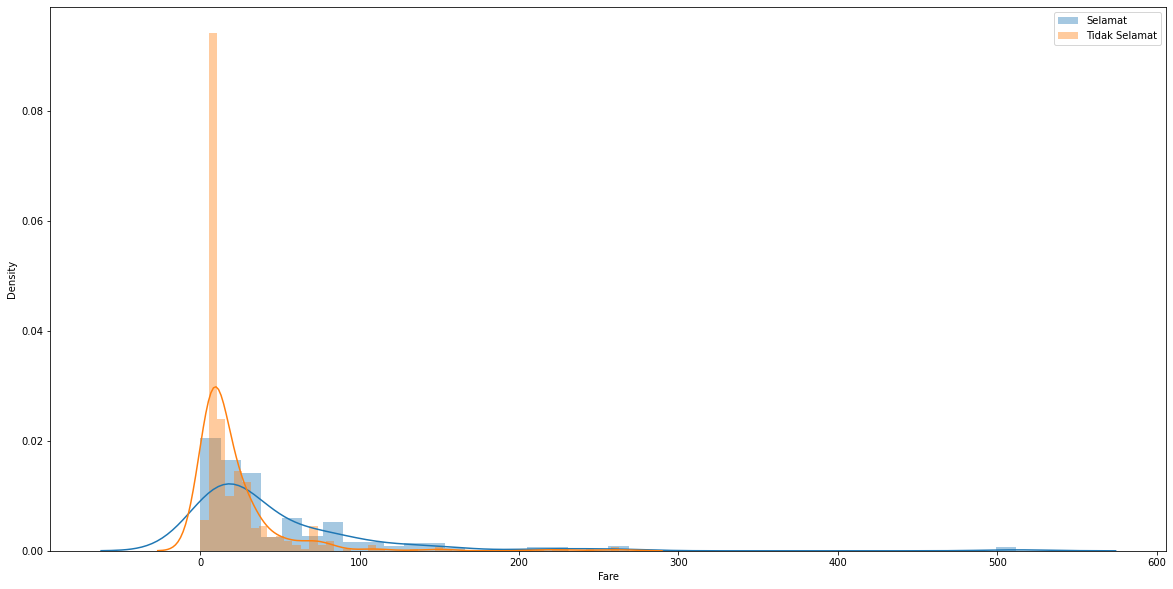

In [45]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Survived']==1]['Fare'], label='Selamat')
sns.distplot(df[df['Survived']==0]['Fare'], label='Tidak Selamat')
plt.legend()
plt.show()

In [46]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7,S
1,1,1,0,38.0,1,0,71,C
2,1,3,0,26.0,0,0,7,S


In [47]:
df = pd.get_dummies(df, columns=['Embarked'], prefix=['emb'])

In [48]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S
0,0,3,1,22.0,1,0,7,0,0,1
1,1,1,0,38.0,1,0,71,1,0,0
2,1,3,0,26.0,0,0,7,0,0,1


In [49]:
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.0,0,0,7,Q
1,3,0,47.0,1,0,7,S
2,2,1,62.0,0,0,9,Q


In [50]:
test = pd.get_dummies(test, columns=['Embarked'], prefix=['emb'])

In [51]:
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S
0,3,1,34.0,0,0,7,0,1,0
1,3,0,47.0,1,0,7,0,0,1
2,2,1,62.0,0,0,9,0,1,0


In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S
0,0,3,1,22.0,1,0,7,0,0,1
1,1,1,0,38.0,1,0,71,1,0,0
2,1,3,0,26.0,0,0,7,0,0,1
3,1,1,0,35.0,1,0,53,0,0,1
4,0,3,1,35.0,0,0,8,0,0,1


Validation & Modeling

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    int64  
 7   emb_C     891 non-null    uint8  
 8   emb_Q     891 non-null    uint8  
 9   emb_S     891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.5 KB


In [54]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [55]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_test, Y_prediction)
acc_random_forest = round(random_forest.score(X_test, Y_prediction) * 100, 2)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [59]:
print(confusion_matrix(Y_test,Y_prediction))

[[97 13]
 [19 50]]


In [60]:
print(precision_score(Y_test,Y_prediction))

0.7936507936507936


In [61]:
test_predict = random_forest.predict(test)

In [62]:
test['Survived'] = test_predict
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S,Survived
0,3,1,34.0,0,0,7,0,1,0,0
1,3,0,47.0,1,0,7,0,0,1,0
2,2,1,62.0,0,0,9,0,1,0,0


Kesimpulan:
0. Lower socio-economic status, pria, umur 34, tidak membawa/bersama keluarga, fare 7, embarked Q, tidak selamat
1. Lower socio-economic status, wanita, umur 47, bersama SibSp, tidak bersama ParCh, fare 7, embarked S, tidak selamat
2. Middle socio-economic status, pria, umur 62, tidak membawa/ bersama keluarga, fare 9, embarked Q, tidak selamat